<a href="https://colab.research.google.com/github/Sebastiao199/Checkpoint3/blob/main/dataprep%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip uninstall pandas-profiling

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from dateutil.parser import parse
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from pandas_profiling import ProfileReport

In [ ]:
link = "https://github.com/murpi/wilddata/raw/master/wine.zip"
df = pd.read_csv(link)

In [ ]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
df.shape

(129957, 14)

In [ ]:
(df['price'].isna().sum()*100)/df.shape[0]

0.0

In [ ]:
df.dropna(subset = ["price", "country"], inplace=True)

### Isolating the vintage (year) in a dedicated column


In [ ]:
def get_year_from_title(title):
  list_years = re.findall(r'\b\d{4}\b', title)
  if len(list_years) > 1:
    list_years = max(list_years)
  return ''.join(list_years)
  
df['year'] = df['title'].apply(get_year_from_title)
df['year']

0         2019
1         2017
2         2019
3         2019
4         2018
          ... 
129952    2019
129953    2010
129954    2019
129955    2018
129956    2018
Name: year, Length: 129957, dtype: object

In [ ]:
df['year'][53057]

'2019'

In [ ]:
df['year'].describe()

count     129957
unique        88
top         2019
freq       15858
Name: year, dtype: object

In [ ]:
type(df['year'][0])

str

### Profile Report on the dataset

In [ ]:
profile_df = ProfileReport(df, title="Wine Market Study - Pandas Profiling Report")

In [ ]:
profile_df.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Market Analysis/Graphics

In [ ]:
groupby_countries = df.groupby(by="country")['title'].count()
# groupby_countries

In [ ]:
countries_ordered = groupby_countries.sort_values(ascending=False)
countries_df = countries_ordered.to_frame()
countries_df.reset_index(inplace=True)
countries_df_top = countries_df.head(10)
countries_df_top

,country,title
0,US,54265
1,France,17765
2,Italy,16914
3,Spain,6573
4,Portugal,4875
5,Chile,4416
6,Argentina,3756
7,Austria,2799
8,Australia,2294
9,Germany,2120


In [ ]:
px.bar(countries_df_top, x='country', y='title')

In [ ]:
groupby_countries_best_scores = df.groupby(by="country")['points'].mean()
# groupby_countries

In [ ]:
countries_orderer2 = groupby_countries_best_scores.sort_values(ascending=False)
countries_df2 = countries_orderer2.to_frame()
countries_df2.reset_index(inplace=True)
countries_df2_top = countries_df2.head(10)
countries_df2_top

,country,points
0,England,91.550725
1,India,90.222222
2,Austria,90.190782
3,Germany,89.836321
4,Canada,89.377953
5,Hungary,89.165517
6,China,89.000000
7,France,88.732114
8,Luxembourg,88.666667
9,Italy,88.618186


In [ ]:
trace1 = go.Bar(x=countries_df2_top['country'], y=countries_df2_top['points'])
layout1 = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="Top 10 countries with the best score"),             )
layout1.update(yaxis=dict(range=[83, 93], autorange=False))
# fig.update_yaxes(range=[0,20])
figure = go.Figure(data=[trace1], layout=layout1)
figure

In [ ]:
groupby_grape_variety = df.groupby(by="variety")['points'].mean()
variety_ordered = groupby_grape_variety.sort_values(ascending=False)
variety_ordered_df = variety_ordered.to_frame()
variety_ordered_df.reset_index(inplace=True)
variety_ordered_df_top = variety_ordered_df.head(10)
variety_ordered_df_top

,variety,points
0,Terrantez,95.000000
1,Gelber Traminer,95.000000
2,Tinta del Pais,95.000000
3,Bual,94.333333
4,Sercial,94.000000
5,Riesling-Chardonnay,94.000000
6,Garnacha-Cariñena,93.000000
7,Roviello,93.000000
8,Blauburgunder,93.000000
9,Ramisco,93.000000


In [ ]:
trace2 = go.Bar(x=variety_ordered_df_top['variety'], y=variety_ordered_df_top['points'])
layout2 = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="Top 10 varieties with the best score"),             )
layout2.update(yaxis=dict(range=[90, 96], autorange=False))
# fig.update_yaxes(range=[0,20])
figure = go.Figure(data=[trace2], layout=layout2)
figure

In [ ]:
decile_per_price = np.percentile(df['price'], np.arange(0, 100, 10))
decile_per_price

array([ 2., 16., 19., 22., 26., 29., 34., 39., 47., 61.])

In [ ]:
decile_per_score = np.percentile(df['points'], np.arange(0, 100, 10))
decile_per_score

array([80., 85., 86., 87., 88., 88., 89., 90., 91., 92.])

In [ ]:
trace3 = go.Bar(y=decile_per_price, orientation='v')
layout3 = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="The distribution of price by decile"),             )
layout3.update(yaxis=dict(range=[0, 65], autorange=False))
# fig.update_yaxes(range=[0,20])
figure = go.Figure(data=[trace3], layout=layout3)
figure

In [ ]:
trace4 = go.Bar(y=decile_per_score, orientation='v')
layout4 = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="The distribution of score by decile"),             )
layout4.update(yaxis=dict(range=[78, 93], autorange=False))
# fig.update_yaxes(range=[0,20])
figure = go.Figure(data=[trace4], layout=layout4)
figure

In [ ]:
pinot_noir = df[df['variety'] == 'Pinot Noir']
pinot_noir

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018
21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,21.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2019 Pinot Noir (Oregon),Pinot Noir,Acrobat,2019
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,51.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2017 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,2017
35,US,As with many of the Erath 2014 vineyard design...,Hyland,86,41.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2016 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,2016
41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,25.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2015 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129906,US,"Shows the clean, citrus acid juiciness and sil...",Fiddlestix Vineyard,91,61.0,California,Sta. Rita Hills,Central Coast,NaN,NaN,Pali 2012 Fiddlestix Vineyard Pinot Noir (Sta....,Pinot Noir,Pali,2012
129917,France,"A powerful, chunky wine, packed with solid tan...",NaN,91,119.0,Burgundy,Grands-Echezeaux,NaN,Roger Voss,@vossroger,Henri de Villamont 2011 Grands-Echezeaux,Pinot Noir,Henri de Villamont,2011
129922,France,A blend from several premier cru vineyards in ...,Premier Cru,91,81.0,Burgundy,Pommard,NaN,Roger Voss,@vossroger,Bouchard Père & Fils 2011 Premier Cru (Pommard),Pinot Noir,Bouchard Père & Fils,2011
129946,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,59.0,Douro,NaN,NaN,Roger Voss,@vossroger,Caves Transmontanas 2012 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,2012


In [ ]:
groupby_countries_pinot = pinot_noir.groupby(by="country")['title'].count()
countries_ordered_pinot = groupby_countries_pinot.sort_values(ascending=False)
countries_pinot_noir = countries_ordered_pinot.to_frame()
countries_pinot_noir.reset_index(inplace=True)
countries_pinot_noir_top = countries_pinot_noir.head(10)
px.bar(countries_pinot_noir_top, x='country', y='title')

In [ ]:
groupby_countries_best_scores = pinot_noir.groupby(by="country")['points'].mean()
countries_orderer2 = groupby_countries_best_scores.sort_values(ascending=False)
countries_pinot_noir2 = countries_orderer2.to_frame()
countries_pinot_noir2.reset_index(inplace=True)
countries_pinot_noir2_top = countries_pinot_noir2.head(10)


trace1 = go.Bar(x=countries_pinot_noir2_top['country'], y=countries_pinot_noir2_top['points'])
layout1 = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="Top 10 countries with the best score"),             )
layout1.update(yaxis=dict(range=[83, 93], autorange=False))
# fig.update_yaxes(range=[0,20])
figure = go.Figure(data=[trace1], layout=layout1)
figure


In [ ]:
decile_per_price_pinot_noir = np.percentile(pinot_noir['price'], np.arange(0, 100, 10))
# decile_per_price
decile_per_score_pinot_noir = np.percentile(pinot_noir['points'], np.arange(0, 100, 10))
# decile_per_score

In [ ]:
trace3 = go.Bar(y=decile_per_price_pinot_noir, orientation='v')
layout3 = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="The distribution of pinot noir price by decile"),)
layout3.update(yaxis=dict(range=[0, 65], autorange=False))
# fig.update_yaxes(range=[0,20])
figure = go.Figure(data=[trace3], layout=layout3)
figure


In [ ]:
trace4 = go.Bar(y=decile_per_score_pinot_noir, orientation='v')
layout4 = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="The distribution of pinot noir score by decile"),)
layout4.update(yaxis=dict(range=[78, 93], autorange=False))
# fig.update_yaxes(range=[0,20])
figure = go.Figure(data=[trace4], layout=layout4)
figure


# WORDCLOUD

In [ ]:
from wordcloud import WordCloud
import nltk
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML



In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('state_union')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


True

In [ ]:
df['description']

1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2016, this...
5         Blackberry and raspberry aromas show a typical...
                                ...                        
129952    Notes of honeysuckle and cantaloupe sweeten th...
129953    Citation is given as much as a decade of bottl...
129954    Well-drained gravel soil gives this wine its c...
129955    A dry style of Pinot Gris, this is crisp with ...
129956    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 120905, dtype: object

In [ ]:
# list_desc = df['description'].tolist()

# def tokenize_func(text):
#   return nltk.word_tokenize(text)

# result_wordcloud = list(map(tokenize_func, list_desc))
# print(result_wordcloud)

# # Use map to turn everything to lower case
# def lower_words(word):
#   print("\nThis is word:\n", word)
#   return word.lower()

# tokens = list(map(lower_words, result_wordcloud))

In [ ]:
# my_stopwords = nltk.corpus.stopwords.words('english')
# my_stopwords.remove('not')
# 'not' in my_stopwords

In [ ]:
# def remove_stopwords(token):
#   return token not in my_stopwords and token.isalnum() # what do I add if I want also to remove punctuation?

# tokens_clean = list(filter(remove_stopwords, tokens))
# tokens_clean

In [ ]:
# my_stopwords = nltk.corpus.stopwords.words('english')
# my_stopwords.remove('not')

# def remove_stopwords(token):
#   return token not in my_stopwords and token.isalnum() # what do I add if I want also to remove punctuation?

# tokens_clean = list(filter(remove_stopwords, df['description'].to_list()))
# tokens_clean

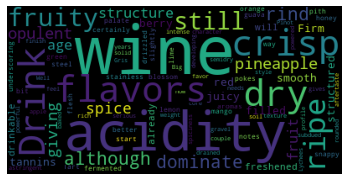

In [ ]:
text = df['description'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

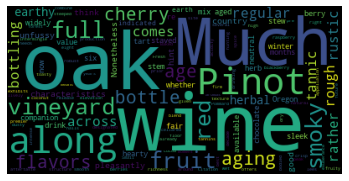

In [ ]:
text = pinot_noir['description'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
burgundy_df = df[df['province'] == 'Burgundy']
# burgundy_df

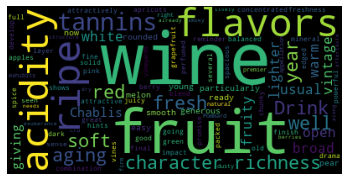

In [ ]:
text = burgundy_df['description'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()